## Python Methods to Derive a Seasonal Mean from Daymet Data for Multiple Years
*Author:  ORNL DAAC*
<br>
*Date:  February 28, 2018*
<br>
*Contact for [ORNL DAAC](https://daac.ornl.gov):  uso@daac.ornl.gov*

##### Keywords:  Daymet, Python, netCDF, THREDDS

### Overview
This tutorial demonstrates how to use the Python netCDF4 and numpy modules to work with N-dimensional array objects from a dataset in netCDF format. Python numpy array methods are shown that open and subset a temporal range from two consecutive years of gridded multidimentional netCDF files.  The example uses data from the maximum temperature variables of a dataset (Daymet) that contain daily gridded meteorologic data.  A summer average maximum temperature is created for two years and the results saved into a new netCDF file. This methodology stands alone, but is part two of a two part tutorial.  The first tutorial provides more introductory information on working with netCDF file formats in Python.![](JJA_2015_tmaxavg.png)

### Source Data
Spatial subsests of the North American Daymet dataset daily data; https://daymet.ornl.gov . For this example, spatial subsets were obtained from the ORNL DAAC's THREDDS netCDF Subset Service (NCSS).   A tutorial of the NCSS is available here:  https://daymet.ornl.gov/web_services.html .

Download the 2015 maximum temperature Daymet subset used in these tutorials by pasting the following HTTP GET NCSS Request URL into a browser: 

https://thredds.daac.ornl.gov/thredds/ncss/ornldaac/1328/2015/daymet_v3_tmax_2015_na.nc4?var=lat&var=lon&var=tmax&north=36.61&west=-85.37&east=-81.29&south=33.57&disableProjSubset=on&horizStride=1&time_start=2015-01-01T12%3A00%3A00Z&time_end=2015-12-31T12%3A00%3A00Z&timeStride=1&accept=netcdf 

Daymet subset data for 2016 can be downloaded by updating the above URL dataset path and changing the time_start and time_end parameters to 2016. 

### Prerequisites
Python 2.7 or later.
Python modules:  netCDF4, numpy, matplotlib

### Procedure
The procedure is outlined in this Jupyter IPython Notebook, [daymet_netCDF_season-avg-loopyrs.ipynb](https://github.com/ornldaac/daymet_netcdf_season-avg/blob/master/daymet_netcdf_season-avg-loopyrs.ipynb). 
<br>
An introductory tutorial with more information on handling Daymet netCDF files in Python is found at: [daymet_netCDF_season-avg.ipynb](https://github.com/ornldaac/daymet_netcdf_season-avg/blob/master/daymet_netCDF_season-avg.ipynb)
<br>
This tutorial is presented in the NASA Earthdata Webinar ["NetCD What? An Ecologists Guide to Working with Daymet and Other netCDF Formatted Data"](https://www.youtube.com/watch?v=Y_f0L62TleE&feature=youtu.be).

------------------

### 1. Load python modules for working with netCDF files.
NumPy is the fundamental package for scientific computing within Python and provides an N-dimensional array object suitable for multidimensional netCDF files.
netCDF4 is a Python interface to the netCDF version 4 library.  netCDF4 relies on NumPy arrays and requires Python 2.7 or later.
Load additional packages for plotting.

In [1]:
import numpy as np  
from netCDF4 import Dataset
from datetime import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

### 2.  Read and create netCDF files.  
Import netCDF file information.  Assume the nc files are in the python script location.
Create a new netCDF file using the netCDF4 Dataset() method.  Open one of the subsets and use some of the file information to populate the new netCDF file.

In [2]:
daymet_ds = Dataset('../daymet_netcdf_season-avg/data/indata/tmax_2015GSMNPsubset.nc', 'r') # read the netCDF file
tmaxJJA_write = Dataset('../daymet_netcdf_season-avg/data/outdata/tmaxJJA_GSMNPsubset.nc', 'w', format='NETCDF4') # creating a file in which to write new climatology

### 3.  Write the dimension, variables, and attributes into the new netCDF file.

For the output netCDF file, create dimensions and variables in which to write the JJA seasonal average.
netCDF defines the sizes of variables in terms of dimensions. Before any variables can be created, the dimensions they use must first be created. In this case, the x and y dimension will be the same size as the input dataset, so we'll call the Python len function to copy the size from the input file. Use the createDimension method to create new dimensions. The first argument supplies the dimension name. The second argument is the size of the dimension. Time will be unlimited, so set to None. Unlimited dimensions can be appended to.  Write the new netCDF file using some information from the existing file.
Use the createVariable method to create variables in the new netCDF file to hold the tmax_JJA_mean and other netCDF variables. The first argument supplies the variable name, the second argument is the datatype (eg. f4 is 32 bit float), the third argument sets the shape. Variable names can be changed using the renameVariable method of a Dataset instance.
Add attributes to the tmax_JJA_mean variable. Attributes can be deleted from a netCDF Dataset, or Variable using the python del statement.

In [3]:
# get dimension size from existing dimensions
x_len = len(daymet_ds.dimensions['x'])
y_len = len(daymet_ds.dimensions['y'])
    
# create dimensions in new file
tmaxJJA_write.createDimension('x', x_len)
tmaxJJA_write.createDimension('y', y_len)
tmaxJJA_write.createDimension('time', None)
   
# read in lat/lon and x/y variable values from existing file
lat_daymet_ds = daymet_ds.variables['lat'][:]
lon_daymet_ds = daymet_ds.variables['lon'][:]
x_daymet_ds = daymet_ds.variables['x'][:]
y_daymet_ds = daymet_ds.variables['y'][:]
    
# create variables in new netCDF file
tmax_JJA_mean_var = tmaxJJA_write.createVariable('tmax_JJA_mean', 'f4', ('time','y','x'), fill_value=-9999)
lat_var = tmaxJJA_write.createVariable('lat', 'f4', ('y','x'))
lon_var = tmaxJJA_write.createVariable('lon', 'f4', ('y','x'))
x_var = tmaxJJA_write.createVariable('x', 'f4', ('x'))
y_var = tmaxJJA_write.createVariable('y', 'f4', ('y'))
proj_var = tmaxJJA_write.createVariable('lambert_conformal_conic', 'u2') # u2:16bit unsigned integer, no dimensions
time_var = tmaxJJA_write.createVariable('time', 'f4', ('time'))

# add attributes for each variable in the new netCDF file
tmax_JJA_mean_var.units = 'degrees C'
tmax_JJA_mean_var.coordinate = 'time y x'
tmax_JJA_mean_var.grid_mapping = 'lambert_conformal_conic'
tmax_JJA_mean_var.cell_methods = 'area: mean time: minimum within days time: mean over days'
tmax_JJA_mean_var.long_name = 'summer mean of daily maximum temperature'
    
lat_var.units = 'degrees_north'
lat_var.long_name = 'latitude coordinate'
lat_var.standard_name = 'latitude'

lon_var.units = 'degrees_east'
lon_var.long_name = 'longitude coordinate'
lon_var.standard_name = 'longitude'

x_var.units = 'km'
x_var.long_name = 'x coordinate of projection'
x_var.standard_name = 'projection_x_coordinate'

y_var.units = 'km'
y_var.long_name = 'y coordinate of projection'
y_var.standard_name = 'projection_y_coordinate'

proj_var.grid_mapping_name = 'lambert_conformal_conic'
proj_var.longitude_of_central_meridian = -100.0
proj_var.latitude_of_projection_origin = 42.5
proj_var.false_easting = 0.0
proj_var.false_northing = 0.0
proj_var.standard_parallel = (25.,  60.)
proj_var.semi_major_axis = 6378137.0
proj_var.inverse_flattening = 298.257223563

time_var.long_name = 'time'
time_var.calendar = 'standard'
time_var.units = 'days since 1980_01_01 00:00:00 UTC'
    
# write lat/lon and x/y values into the new netCDF file
lat_var[:,:] = lat_daymet_ds
lon_var[:,:] = lon_daymet_ds
x_var[:] = x_daymet_ds
y_var[:] = y_daymet_ds


In [4]:
daymet_ds.close()

### 4. Create a seasonal average of the GSMNP spatial subset and write the data into the new netCDF file.
To create a temporal mean from the daily data, subset the tmax variable to a time set of interest.
For example, a summer, or JuneJulyAugust, subset would be yearday 151 - 243.  

In [5]:
for year in range(2015, 2017):
    startYear = 2015
    nc_in = "../daymet_netcdf_season-avg/data/indata/tmax_" + str(year) + "GSMNPsubset.nc"
    print(nc_in)
    daymet_JJA = Dataset(nc_in, 'r') # read the netCDF file
    
    tmax_JJA = daymet_JJA.variables['tmax'][151:243 , :, :]  # We're not subsetting the x or y dimension.
    tmax_JJA_mean_comp = np.mean(tmax_JJA, axis=0, keepdims=True)
    tmax_JJA_mean_var[year-startYear, :, :] = tmax_JJA_mean_comp
    
    # Determine the time value as days since Jan 1, 1980 and write into the proper time index.  The time stamp will be mid-July for each year
    date_format = "%m/%d/%Y"
    startdate = datetime.strptime('1/1/1980', date_format)
    stopdate = datetime.strptime('7/15/' + str(year), date_format)
    delta = stopdate - startdate
    days = delta.days
    time_var[year-startYear] = days

../daymet_netcdf_season-avg/data/indata/tmax_2015GSMNPsubset.nc
../daymet_netcdf_season-avg/data/indata/tmax_2016GSMNPsubset.nc


In [6]:
#  lets review the variables and shape of the netCDF files.
print(daymet_JJA.variables.keys())
print('\n')
print(daymet_JJA.variables['tmax'])
print('\n')
print(tmaxJJA_write.variables.keys())
print('\n')
print(tmaxJJA_write.variables['tmax_JJA_mean'])
print('\n')
print(tmax_JJA_mean_var)

odict_keys(['lat', 'y', 'x', 'lambert_conformal_conic', 'lon', 'tmax', 'time'])


<class 'netCDF4._netCDF4.Variable'>
float32 tmax(time, y, x)
    _FillValue: -9999.0
    long_name: daily maximum temperature
    units: degrees C
    missing_value: -9999.0
    coordinates: time y x 
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: maximum
    _ChunkSizes: [   1 1000 1000]
unlimited dimensions: time
current shape = (365, 390, 417)
filling off



odict_keys(['tmax_JJA_mean', 'lat', 'lon', 'x', 'y', 'lambert_conformal_conic', 'time'])


<class 'netCDF4._netCDF4.Variable'>
float32 tmax_JJA_mean(time, y, x)
    _FillValue: -9999.0
    units: degrees C
    coordinate: time y x
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: minimum within days time: mean over days
    long_name: summer mean of daily maximum temperature
unlimited dimensions: time
current shape = (2, 390, 417)
filling on


<class 'netCDF4._netCDF4.Variable'>
float32 tmax_

In [7]:
# Close the files  
daymet_JJA.close()
tmaxJJA_write.close()

In [8]:
# Reading in the summer average from the new file for plotting.
daymet_JJA_2years = Dataset('../daymet_netcdf_season-avg/data/outdata/tmaxJJA_GSMNPsubset.nc', 'r')
print(daymet_JJA_2years.variables.keys())
tmax_JJA2015_mean = daymet_JJA_2years.variables['tmax_JJA_mean'][0:1, :, :]
tmax_JJA2016_mean = daymet_JJA_2years.variables['tmax_JJA_mean'][1:2, :, :]

tmax_units = daymet_JJA_2years.variables['tmax_JJA_mean'].units
lons = daymet_JJA_2years.variables['lon'][:]
lats = daymet_JJA_2years.variables['lat'][:]

print(tmax_JJA2015_mean.shape)
print(tmax_JJA2016_mean.shape)
tmax_JJA2015_mean.shape=(390,417) # In order to plot, reduce the shape to 2D
tmax_JJA2016_mean.shape=(390,417)
print(tmax_JJA2015_mean.shape)

print(lats.shape)  # Checking the lat/lon match the shape of the tmax variable.
print(lons.shape)

odict_keys(['tmax_JJA_mean', 'lat', 'lon', 'x', 'y', 'lambert_conformal_conic', 'time'])
(1, 390, 417)
(1, 390, 417)
(390, 417)
(390, 417)
(390, 417)


In [9]:
daymet_JJA_2years.close()

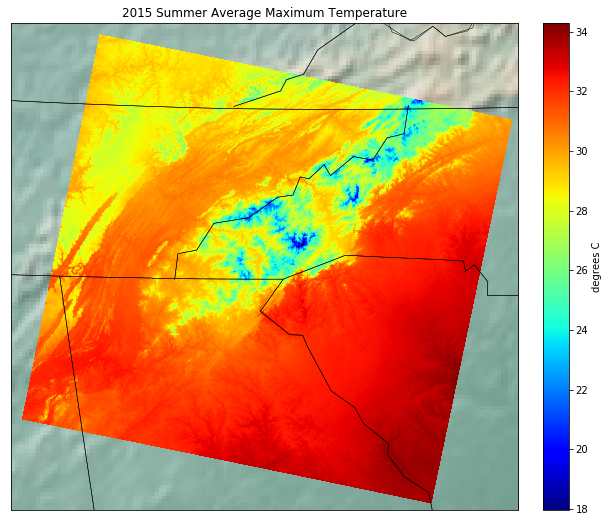

In [10]:
#  Plotting the JJA averages for each year.
min_lon = lons.min()
max_lon = lons.max()
min_lat = lats.min()
max_lat = lats.max()

plt.figure(figsize=(10,10))
plt.title('2015 Summer Average Maximum Temperature')
map = Basemap(llcrnrlon=min_lon + -.1,
              llcrnrlat=min_lat - .10,
              urcrnrlon=max_lon + .10,
              urcrnrlat=max_lat + .10,
              rsphere=(6378137.00,6356752.3142),
              resolution='l',
              area_thresh=1000.,
              projection='lcc',
              lat_1=35.0,lon_0=-83.0)

map.shadedrelief()
map.drawstates()

colors = map.pcolor(lons, lats, tmax_JJA2015_mean, latlon=True, cmap='jet')

cbar = map.colorbar(colors, location='right', pad='5%')
cbar.set_label(tmax_units)

plt.savefig('../daymet_netcdf_season-avg/data/outdata/JJA_2015_tmaxavg.png')
plt.show()

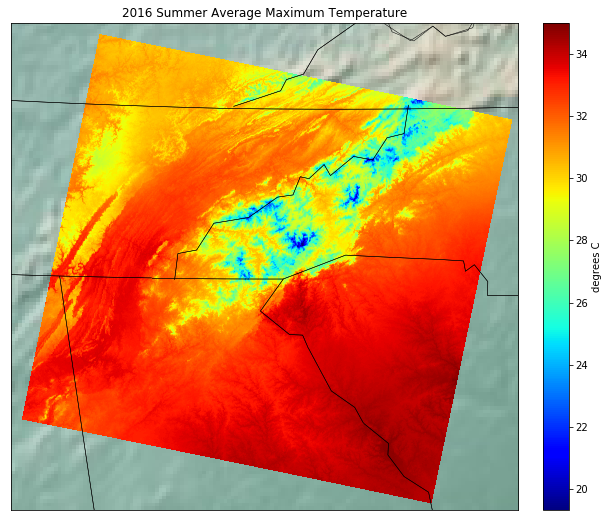

In [11]:
min_lon = lons.min()
max_lon = lons.max()
min_lat = lats.min()
max_lat = lats.max()

plt.figure(figsize=(10,10))
plt.title('2016 Summer Average Maximum Temperature')
map = Basemap(llcrnrlon=min_lon + -.1,
              llcrnrlat=min_lat - .10,
              urcrnrlon=max_lon + .10,
              urcrnrlat=max_lat + .10,
              rsphere=(6378137.00,6356752.3142),
              resolution='l',
              area_thresh=1000.,
              projection='lcc',
              lat_1=35.0,lon_0=-83.0)

map.shadedrelief()
map.drawstates()

colors = map.pcolor(lons, lats, tmax_JJA2016_mean, latlon=True, cmap='jet')

cbar = map.colorbar(colors, location='right', pad='5%')
cbar.set_label(tmax_units)

plt.savefig('../daymet_netcdf_season-avg/data/outdata/JJA_2016_tmaxavg.png')
plt.show()